<a href="https://colab.research.google.com/github/atheostheos/ML_2023/blob/main/03_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашние задания

## 1

- 1.1 Написать функцию для сжатия изображения в k раз (по каждой стороне) (k - целое число, задаваемое пользователем).
- 1.2 Выполнить вычисление среднего значения цвета пикселей при сжатии с помощью срезов исходного массива изображения.

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [1]:
!wget https://upload.wikimedia.org/wikipedia/en/e/ef/Blame%21_manga_vol_1.jpg -O blame.jpg

--2023-11-11 18:01:50--  https://upload.wikimedia.org/wikipedia/en/e/ef/Blame%21_manga_vol_1.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27357 (27K) [image/jpeg]
Saving to: ‘blame.jpg’

blame.jpg           100%[===================>]  26.72K  --.-KB/s    in 0.02s   

2023-11-11 18:01:50 (1.58 MB/s) - ‘blame.jpg’ saved [27357/27357]



In [109]:
def compress_image(img: np.ndarray, k:int = 20):
  height, width = img.shape[:2]
  nxs = width // k
  nys = height // k
  img_compressed = np.zeros(shape=(k, k, 3), dtype=int)
  for y in range(k):
    for x in range(k):
      img_chunk = img[y*nys:y*nys + nys, x*nxs:x*nxs + nxs]
      img_compressed[y, x] = np.mean(np.mean(img_chunk, axis=0), axis=0).astype(int)

  return img_compressed

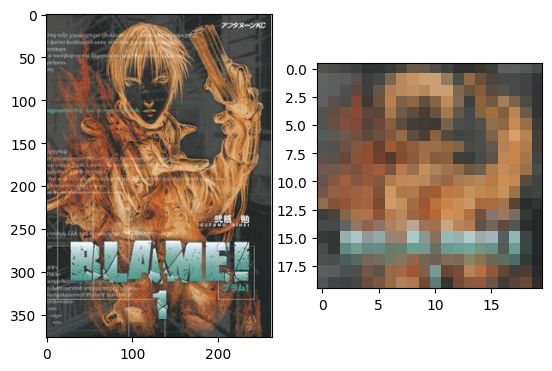

In [110]:
img = cv2.imread("blame.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_compressed = compress_image(img)

plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.imshow(img_compressed)

plt.show()

## 2

Пиксельная маска части изображения

Дано:
- изображение (формат jpg/png)
- диапазон строк для маски (y_min, y_max)
- диапазон столбцов для маски (x_min, x_max)
- число разбиений на области (h, например, для h=10 маска разбивается на 10*10=100 равных областей)

Требуется:
- написать алгоритм усреднения цвета в каждой области (усреднение по каждому цветовому каналу: R,G,B)

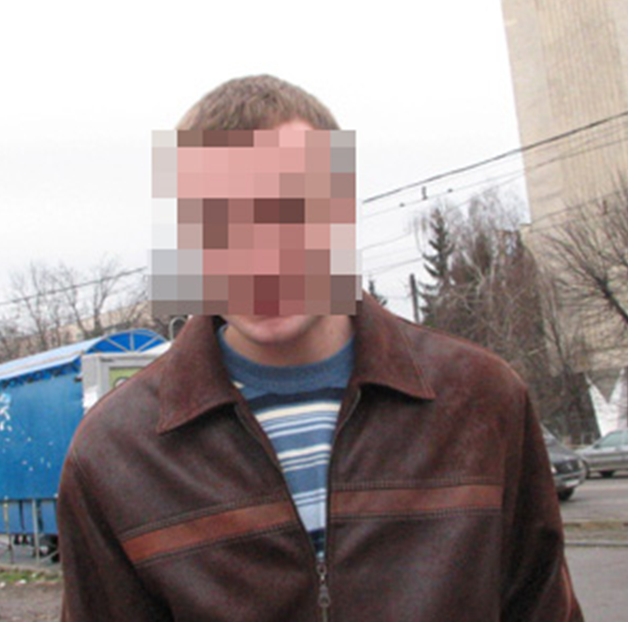

In [47]:
!wget https://static.wikia.nocookie.net/tsutomu-nihei/images/8/82/Limit_off.jpg/revision/latest?cb=20170913135303 -O killi.jpg

--2023-11-11 18:24:12--  https://static.wikia.nocookie.net/tsutomu-nihei/images/8/82/Limit_off.jpg/revision/latest?cb=20170913135303
Resolving static.wikia.nocookie.net (static.wikia.nocookie.net)... 74.120.184.194, 74.120.184.204
Connecting to static.wikia.nocookie.net (static.wikia.nocookie.net)|74.120.184.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 128945 (126K) [image/jpeg]
Saving to: ‘killi.jpg’

killi.jpg           100%[===================>] 125.92K  --.-KB/s    in 0.06s   

2023-11-11 18:24:12 (1.97 MB/s) - ‘killi.jpg’ saved [128945/128945]



In [112]:
from PIL import ImageFile
def pixelize(img: np.ndarray, k:int = 20):
  height, width = img.shape[:2]
  nxs = width // k + int(width % k > 0)
  nys = height // k + int(height % k > 0)
  img_pixelized = np.zeros(shape=(height, width, 3), dtype=int)
  for y in range(k):
    for x in range(k):
      img_chunk = img[y*nys:y*nys + nys, x*nxs:x*nxs + nxs]
      clr_mean = np.mean(np.mean(img_chunk, axis=0), axis=0).astype(int)
      tile = np.zeros(shape=img_pixelized[y*nys:y*nys + nys, x*nxs:x*nxs + nxs].shape)
      tile[:,:, 0] = clr_mean[0]
      tile[:,:, 1] = clr_mean[1]
      tile[:,:, 2] = clr_mean[2]

      img_pixelized[y*nys:y*nys + nys, x*nxs:x*nxs + nxs] = tile

  return img_pixelized


def pixelize_part(
    img: np.ndarray,
    x_min: int, x_max: int,
    y_min: int, y_max: int,
    h: int=10):
  height, width = img.shape[:2]
  img_pixelized = pixelize(img, k=h)

  img_out = img.copy()

  img_out[y_min:y_max, x_min:x_max] = img_pixelized[y_min:y_max, x_min:x_max]

  return img_out

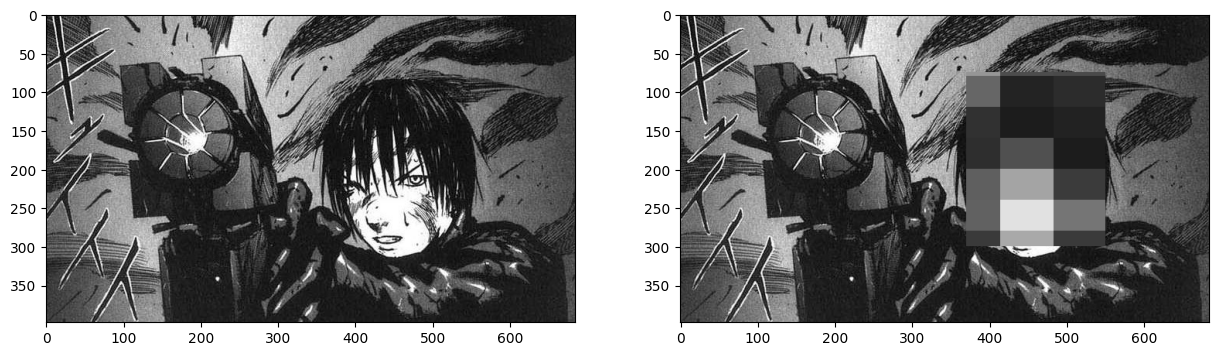

In [113]:
img = cv2.imread("killi.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_pixelized = pixelize_part(
    img,
    370, 550,
    75, 300,
    h=10)

plt.figure(figsize=(15, 15))

plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.imshow(img_pixelized)

plt.show()